In [961]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import math
import random
import networkx as nx
from sympy import * 
import multinetx as mx

In [968]:
N = 20                               # firstly, I made 20 nodes for A and B layers
A = mx.erdos_renyi_graph(N,0.2)      # A layer that random network is used 
B = mx.erdos_renyi_graph(N,0.2)      # B layer that random network is used 

In [969]:
adj_block = mx.lil_matrix(np.zeros((N*2,N*2))) # I used the adjacency matrix 
                                               # for interconnected relation
adj_block[0:  N,N:2*N] = np.identity(N)   
adj_block[N:2*N,0: N] = np.identity(N)   
# use symmetric inter-adjacency matrix
adj_block += adj_block.T

In [970]:

mg = mx.MultilayerGraph(list_of_layers=[A,B],           
                        inter_adjacency_matrix=adj_block)
# This function can make connection between layer A and B

mg.set_edges_weights(inter_layer_edges_weight=2)        
mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=-1)
# This fuction can set up the weights of internal and external edges

In [1006]:
# It shows the information of multilayers
print ('MultiNetX name:\n', mg.name ,'\n', mg.info(),'\n')      
print ('MultilayerGraph edges:',\
        '\n\n intra-layer edges: ',mg.get_intra_layer_edges(),\
        '\n\n inter-layer edges: ',mg.get_inter_layer_edges(),'\n') 

MultiNetX name:
 multilayer__ 
 2-layer graph,                intra_layer_edges:99,                inter_layer_edges:20,                number_of_nodes_in_layer:20  

MultilayerGraph edges: 

 intra-layer edges:  [(0, 2), (0, 11), (0, 20), (1, 5), (1, 11), (1, 12), (1, 15), (1, 17), (1, 21), (2, 17), (2, 18), (2, 22), (3, 7), (3, 10), (3, 12), (3, 13), (3, 23), (4, 7), (4, 11), (4, 12), (4, 13), (4, 15), (4, 16), (4, 17), (4, 24), (5, 7), (5, 8), (5, 14), (5, 15), (5, 25), (6, 8), (6, 12), (6, 26), (7, 9), (7, 14), (7, 27), (8, 15), (8, 28), (9, 16), (9, 17), (9, 18), (9, 19), (9, 29), (10, 14), (10, 17), (10, 18), (10, 30), (11, 13), (11, 31), (12, 32), (13, 19), (13, 33), (14, 34), (15, 35), (16, 17), (16, 36), (17, 37), (18, 38), (19, 39), (20, 25), (20, 32), (20, 36), (21, 22), (21, 24), (21, 38), (22, 24), (22, 25), (22, 26), (22, 27), (22, 32), (22, 33), (22, 34), (22, 35), (22, 39), (23, 24), (23, 26), (23, 32), (23, 35), (23, 36), (24, 27), (24, 32), (24, 33), (25, 26), (25, 27

MultilayerGraph edges: 

 intra-layer edges:  [(0, 2), (0, 11), (0, 20), (1, 5), (1, 11), (1, 12), (1, 15), (1, 17), (1, 21), (2, 17), (2, 18), (2, 22), (3, 7), (3, 10), (3, 12), (3, 13), (3, 23), (4, 7), (4, 11), (4, 12), (4, 13), (4, 15), (4, 16), (4, 17), (4, 24), (5, 7), (5, 8), (5, 14), (5, 15), (5, 25), (6, 8), (6, 12), (6, 26), (7, 9), (7, 14), (7, 27), (8, 15), (8, 28), (9, 16), (9, 17), (9, 18), (9, 19), (9, 29), (10, 14), (10, 17), (10, 18), (10, 30), (11, 13), (11, 31), (12, 32), (13, 19), (13, 33), (14, 34), (15, 35), (16, 17), (16, 36), (17, 37), (18, 38), (19, 39), (20, 25), (20, 32), (20, 36), (21, 22), (21, 24), (21, 38), (22, 24), (22, 25), (22, 26), (22, 27), (22, 32), (22, 33), (22, 34), (22, 35), (22, 39), (23, 24), (23, 26), (23, 32), (23, 35), (23, 36), (24, 27), (24, 32), (24, 33), (25, 26), (25, 27), (25, 29), (25, 33), (25, 39), (26, 28), (27, 36), (28, 35), (29, 34), (29, 35), (30, 39), (31, 36), (32, 39), (34, 35), (34, 37), (34, 39), (36, 39)] 

 inter-layer

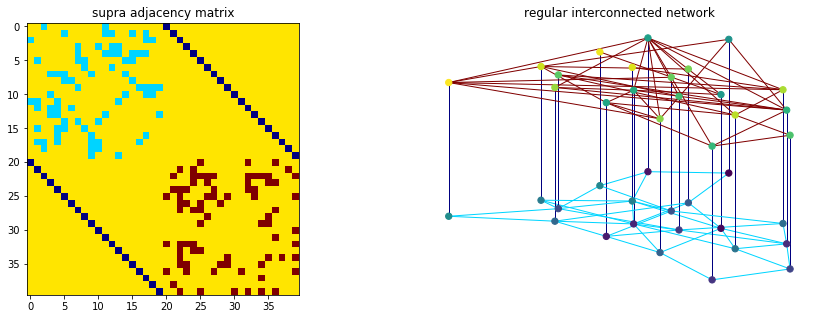

In [1005]:
# This funtion visualize the graph 
fig = plt.figure(figsize=(15,5)) 
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')
ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('regular interconnected network')
# It shows the adjacency matrix
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(mg.get_layer(0)),
                      layer_vertical_shift=0.6,
                      layer_horizontal_shift=0.0,
                      proj_angle=50)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=40, 
                 node_color =[np.array(mg.nodes())[a] for a in np.array(mg.nodes())] , 
                 with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()
# It shows the graph of multilayer


In [900]:
mg.nodes==A.nodes

False

In [990]:
mg[1][5]

{'weight': 1}

In [8]:
A = [1, 2] * 50 
random.shuffle(A)

In [19]:
B = G.add_nodes_from(A)

In [23]:
B

In [24]:
G = nx.complete_graph(100)

In [11]:
G

In [2]:
import multinetx as mx

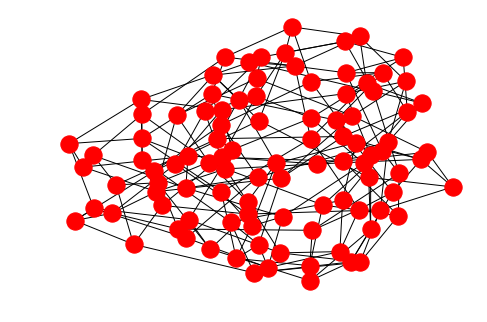

In [18]:
nx.draw(A)

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
A = nx.generators.random_graphs.random_regular_graph(4, 100)
B = nx.generators.random_graphs.random_regular_graph(4, 100)

In [24]:
adj_block = mx.lil_matrix(np.zeros((N*3,N*3)))

AttributeError: module 'multinetx' has no attribute 'lil_matrix'

In [ ]:
mg.layers_interconnect(inter_adjacency_matrix=adj_block)

In [9]:
import multinetx as mx
N = 5
g1 = mx.generators.erdos_renyi_graph(N,0.9,seed=218)
g2 = mx.generators.erdos_renyi_graph(N,0.9,seed=211)
g3 = mx.generators.erdos_renyi_graph(N,0.9,seed=208)

AttributeError: module 'multinetx' has no attribute 'generators'

In [10]:
mg = mx.MultilayerGraph(list_of_layers=[A,B])

AttributeError: module 'multinetx' has no attribute 'MultilayerGraph'

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mayavi import mlab

import random

def draw_graph3d(graph, graph_colormap='winter', bgcolor = (1, 1, 1),
                 node_size=0.03,
                 edge_color=(0.8, 0.8, 0.8), edge_size=0.002,
                 text_size=0.008, text_color=(0, 0, 0)):

    H=nx.Graph()

    # add edges
    for node, edges in graph.items():
        for edge, val in edges.items():
            if val == 1:
                H.add_edge(node, edge)

    G=nx.convert_node_labels_to_integers(H)

    graph_pos=nx.spring_layout(G, dim=3)

    # numpy array of x,y,z positions in sorted node order
    xyz=np.array([graph_pos[v] for v in sorted(G)])

    # scalar colors
    scalars=np.array(G.nodes())+5
    mlab.figure(1, bgcolor=bgcolor)
    mlab.clf()

    #----------------------------------------------------------------------------
    # the x,y, and z co-ordinates are here
    # manipulate them to obtain the desired projection perspective 
    pts = mlab.points3d(xyz[:,0], xyz[:,1], xyz[:,2],
                        scalars,
                        scale_factor=node_size,
                        scale_mode='none',
                        colormap=graph_colormap,
                        resolution=20)
    #----------------------------------------------------------------------------

    for i, (x, y, z) in enumerate(xyz):
        label = mlab.text(x, y, str(i), z=z,
                          width=text_size, name=str(i), color=text_color)
        label.property.shadow = True

    pts.mlab_source.dataset.lines = np.array(G.edges())
    tube = mlab.pipeline.tube(pts, tube_radius=edge_size)
    mlab.pipeline.surface(tube, color=edge_color)

    mlab.show() # interactive window

# create tangled hypercube
def make_graph(nodes):

    def make_link(graph, i1, i2):
        graph[i1][i2] = 1
        graph[i2][i1] = 1

    n = len(nodes)

    if n == 1: return {nodes[0]:{}}

    nodes1 = nodes[0:n/2]
    nodes2 = nodes[n/2:]
    G1 = make_graph(nodes1)
    G2 = make_graph(nodes2)

    # merge G1 and G2 into a single graph
    G = dict(G1.items() + G2.items())

    # link G1 and G2
    random.shuffle(nodes1)
    random.shuffle(nodes2)
    for i in range(len(nodes1)):
        make_link(G, nodes1[i], nodes2[i])

    return G

# graph example
nodes = range(10)
graph = make_graph(nodes)
draw_graph3d(graph)

ModuleNotFoundError: No module named 'mayavi'

In [40]:
mg = nx.MultiGraph()
mg.add_weighted_edges_from([(1,2,.5), (1,2,.75),(2,3,.5)])
mg.degree(weighted=True)
{1: 1.25, 2: 1.75, 3: 0.5}


TypeError: __call__() got an unexpected keyword argument 'weighted'

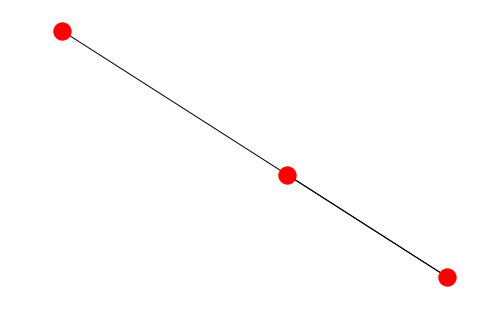

In [41]:
nx.draw(mg)